In [4]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,KBinsDiscretizer,MinMaxScaler,StandardScaler,PolynomialFeatures

from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import precision_recall_curve,roc_curve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest,SelectFromModel,f_classif,chi2

from sklearn.decomposition import KernelPCA,PCA


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## load data

In [2]:
# df_train = pd.read_csv('train.csv',na_values=[' '])

## pre processing

In [3]:

# #display(df_train.NOEXCH.unique())
# #df_train.head()
# #df_test = pd.read_csv('train.csv')

# df_train.loc[df_train.NOEXCH == 1, 'NOEXCH']   = 'X'
# df_train.loc[df_train.NOEXCH == 0, 'NOEXCH']   = np.nan
# df_train.loc[df_train.NOEXCH == '1', 'NOEXCH']   = 'X'
# df_train.loc[df_train.NOEXCH == '0', 'NOEXCH']   = np.nan

# df_train.NOEXCH.unique()

In [4]:


#print(df_train.isna().sum())
#df_train.describe().T

In [5]:
# features1= [] 
# #list(['cat1','cat2','cat3'])

# for i in range(3,25):
#     features1.append('RAMNT_' + str(i) )
# features1.append()
# df_train[features1].corr()


In [6]:
# print(df_train[['RAMNTALL']].isna().sum())
# df_train[['RAMNTALL']].apply(lambda x: x.corr(df_train.TARGET_D))

# #df_train.drop("TARGET_B", axis=1).apply(lambda x: x.corr(df_train.TARGET_B))

In [7]:

# c = df_train.corr().abs()

# s = c.unstack()

# so = s.sort_values(kind="quicksort")

# display(so.shape)

# print(so[-2000:-1])

In [8]:
#df_train.corr()['TARGET_B']
# cols=df_train.columns[(df_train.isna().sum() == 0)]
# cols = cols[cols != 'OSOURCE']
# cols = cols[cols != 'STATE']
# display(cols)

# df_new[cols].apply(lambda x: x.corr(df_new.TARGET_B))

## Pre processing

In [9]:
# imputer = SimpleImputer(strategy = 'most_frequent')
# df_train[['AGE']] = imputer.fit_transform(df_train[['AGE']])



## set X,y

In [10]:
# X = df_train.drop(['TARGET_B','TARGET_D'],axis=1)
# y = df_train.TARGET_B

# X_train,X_test,y_train ,y_test = train_test_split(X,y,random_state = 42,train_size = 0.8,test_size=0.2)
# #X_train,X_test ,y_train ,y_test

# #print(X_train.isna().sum().to_string())

In [11]:
# X_train_sub = X_train[['AGE']]
# X_test_sub = X_test[['AGE']]



## LogisticRegression

In [12]:
# model = LogisticRegression()
# model.fit(X_train_sub,y_train)

# #y_pred = model.predict(X_test_sub)
# y_test_pred = cross_val_predict(model,X_test_sub,y_test,cv=3)
# conf_mat = confusion_matrix(y_test,y_test_pred)
# f1 = f1_score(y_test,y_test_pred)

# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_sub, y_test)))
# print('f1 of logistic regression classifier on test set: {:.2f}'.format(f1))
# display(conf_mat)

## SGDClassifier

In [13]:
# sgd_clf = SGDClassifier(random_state=0,max_iter=50)
# sgd_clf.fit(X_train_sub,y_train)

# #y_pred = model.predict(X_test_sub)
# y_test_pred = cross_val_predict(sgd_clf,X_test_sub,y_test,cv=3)
# conf_mat = confusion_matrix(y_test,y_test_pred)
# f1 = f1_score(y_test,y_test_pred)

# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(sgd_clf.score(X_test_sub, y_test)))
# print('f1 of logistic regression classifier on test set: {:.2f}'.format(f1))
# display(conf_mat)


### RandomForestClassifier

In [14]:
# forest_clf = RandomForestClassifier(n_estimators=1)
# forest_clf.fit(X_train_sub,y_train)

# #y_pred = model.predict(X_test_sub)
# y_test_pred = cross_val_predict(forest_clf,X_test_sub,y_test,cv=3)
# conf_mat = confusion_matrix(y_test,y_test_pred)
# f1 = f1_score(y_test,y_test_pred)

# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(forest_clf.score(X_test_sub, y_test)))
# print('f1 of logistic regression classifier on test set: {:.2f}'.format(f1))
# display(conf_mat)

### LogisticRegression + PolynomialFeatures

In [15]:
# poly = PolynomialFeatures(degree=4)

# model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
# model = make_pipeline(poly, model)
# model.fit(X_train_sub, y_train)

# #y_pred = model.predict(X_test_sub)
# y_test_pred = cross_val_predict(model,X_test_sub,y_test,cv=3)
# conf_mat = confusion_matrix(y_test,y_test_pred)
# f1 = f1_score(y_test,y_test_pred)

# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test_sub, y_test)))
# print('f1 of logistic regression classifier on test set: {:.2f}'.format(f1))
# display(conf_mat)
    


### SGDClassifier + PolynomialFeatures

In [16]:
# poly = PolynomialFeatures(degree=4)

# sgd_clf = SGDClassifier(random_state=0,max_iter=50)
# sgd_clf = make_pipeline(poly, sgd_clf)
# sgd_clf.fit(X_train_sub, y_train)

# #y_pred = model.predict(X_test_sub)
# y_test_pred = cross_val_predict(sgd_clf,X_test_sub,y_test,cv=3)
# conf_mat = confusion_matrix(y_test,y_test_pred)
# f1 = f1_score(y_test,y_test_pred)

# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(sgd_clf.score(X_test_sub, y_test)))
# print('f1 of logistic regression classifier on test set: {:.2f}'.format(f1))
# display(conf_mat)
    


### KNeighborsClassifier

In [17]:
# poly = PolynomialFeatures(degree=4)

# knn = make_pipeline(poly, KNeighborsClassifier(n_neighbors=5))
# knn.fit(X_train_sub, y_train)

# #y_pred = model.predict(X_test_sub)
# y_test_pred = cross_val_predict(knn,X_test_sub,y_test,cv=3)
# conf_mat = confusion_matrix(y_test,y_test_pred)
# f1 = f1_score(y_test,y_test_pred)

# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(knn.score(X_test_sub, y_test)))
# print('f1 of logistic regression classifier on test set: {:.2f}'.format(f1))
# display(conf_mat)

### ColumnTransformer

In [18]:
# #print(X_train.isna().sum())
# # X_train.info()
# # print(X_train.select_dtypes(include=['float64','int64']).columns)
# X = df_train.drop(['TARGET_B','TARGET_D'],axis=1)
# y = df_train.TARGET_B

# print(X.shape)

# numeric_features = X.select_dtypes(include=['float64','int64']).columns
# numeric_transformer = Pipeline([('imputer',SimpleImputer(strategy='median'))])

# #create the preprocessing pipeline for the categorial data
# category_features = X.select_dtypes(include=['object']).columns
# category_transformer = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
#                                ('onehot',OneHotEncoder())])


# preprocessor = ColumnTransformer([
#      ('num',numeric_transformer,numeric_features)
#      #('cat',category_transformer,category_features)
# ])#,remainder='passthrough')

# clf = Pipeline([
#     ('pre',preprocessor)
#     #('cls',RandomForestClassifier(n_estimators=5))
# ])



# #X_train,X_test,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
# #X_train,X_test ,y_train ,y_test

# X_train_pre = clf.fit_transform(X)




## VarianceThreshold

In [19]:
### VarianceThreshold


# print(X_train_pre.shape)

# sel = VarianceThreshold(threshold=0.05)
# X_train_pre = sel.fit_transform(X_train_pre)

# print(X_train_pre.shape)







In [20]:
# #X_train_pre_centered = X_train_pre - X_train_pre.mean(axis=0)
# df = pd.DataFrame(X_train_pre)
# df


## train / Test

In [21]:
# X_train,X_test,y_train ,y_test = train_test_split(df,y,test_size=0.2,random_state = 42,stratify=y)
# X_train,X_test ,y_train ,y_test

# print(X_train_pre.shape)
# # print(X_train_pre.info())
# # X_train = df.select_dtypes(include=['float64','int64'])
# #print(X_train)




### PCA & RandomForestClassifier

In [22]:
# pca = PCA(n_components = 20)
# X_train_after_pca = pca.fit_transform(X_train)
# X_test_after_pca = pca.transform(X_test)

# forest_clf = RandomForestClassifier(n_estimators=15)
# forest_clf.fit(X_train_after_pca, y_train)

# #y_pred = model.predict(X_test_sub)
# y_test_pred = cross_val_predict(forest_clf,X_test_after_pca, y_test, cv=3)
# conf_mat = confusion_matrix(y_test,y_test_pred)
# f1 = f1_score(y_test,y_test_pred)
# accuracy = accuracy_score(y_test,y_test_pred)

# print('Accuracy  classifier on test set: {:.2f}'.format(accuracy))
# print('f1 of logistic regression classifier on test set: {:.2f}'.format(f1))
# display(conf_mat)

In [23]:
# clf_selected = make_pipeline(
#         SelectKBest(f_classif, k=15),  LinearSVC()
# )
# clf_selected.fit(X_train, y_train)


# y_test_pred = cross_val_predict(clf_selected,X_test, y_test, cv=3,)
# conf_mat = confusion_matrix(y_test,y_test_pred)

# f1 = f1_score(y_test,y_test_pred)
# accuracy = accuracy_score(y_test,y_test_pred)

# print('Accuracy of classifier on test set: {:.2f}'.format(accuracy))
# print('f1 of logistic regression classifier on test set: {:.2f}'.format(f1))
# display(conf_mat)

#######################

In [24]:

# numeric_features = ['AGE']
# numeric_transformer = Pipeline([('imputer',SimpleImputer(strategy='most_frequent'))])

# category_features = ['STATE','GENDER']
# category_transformer = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
#                                ('onehot',OneHotEncoder(sparse=False))])


# preprocessor = ColumnTransformer([
#      ('num',numeric_transformer,numeric_features),
#      ('cat',category_transformer,category_features)
# ])#,remainder='passthrough')

# clf = Pipeline([
#     ('pre',preprocessor)
#     #('cls',RandomForestClassifier(n_estimators=5))
# ])




In [25]:


# df_train = pd.read_csv('train.csv',na_values=[' '])
# #print(df_train.dtypes)

# df_train.loc[df_train.NOEXCH == 1, 'NOEXCH']   = 'X'
# df_train.loc[df_train.NOEXCH == 0, 'NOEXCH']   = np.nan
# df_train.loc[df_train.NOEXCH == '1', 'NOEXCH']   = 'X'
# df_train.loc[df_train.NOEXCH == '0', 'NOEXCH']   = np.nan

# df_train.drop(['OSOURCE'],axis=1,inplace=True)


# X = df_train.drop(['TARGET_B','TARGET_D'],axis=1)
# y = df_train.TARGET_B

# X_train_pre = clf.fit_transform(X)

In [26]:
# X_train,X_test,y_train ,y_test = train_test_split(X_train_pre,y,test_size=0.2,random_state = 42,stratify=y)
# X_train.shape
# #X_train,X_test ,y_train ,y_test

In [27]:
# clf_selected = make_pipeline(
#         SelectKBest(f_classif, k=15),  LinearSVC()
# )
# clf_selected.fit(X_train, y_train)


# y_test_pred = cross_val_predict(clf_selected,X_test, y_test, cv=3,)
# conf_mat = confusion_matrix(y_test,y_test_pred)

# f1 = f1_score(y_test,y_test_pred)
# accuracy = accuracy_score(y_test,y_test_pred)

# print('Accuracy of classifier on test set: {:.2f}'.format(accuracy))
# print('f1 of logistic regression classifier on test set: {:.2f}'.format(f1))
# display(conf_mat)

###########     2    ############

In [5]:
df_train = pd.read_csv('train.csv',na_values=[' '])
# df_train_true = df_train[df_train.TARGET_B==1]
# df_train_false = df_train[df_train.TARGET_B==0]


C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,8,9,10,11,12,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# print(df_train.shape)
# print(df_train_true.shape)
# print(df_train_false.shape)

(95412, 481)
(4843, 481)
(90569, 481)


In [11]:
# from sklearn.utils import shuffle

# df_train_false = shuffle(df_train_false)

# n = df_train_false.shape[0] * 2
# n = n / df_train_true.shape[0]
# n = int(np.round(n,0))
# print(n)


# df_train_2 = pd.concat([df_train_true] * n )
# print(df_train_2.shape)
# df_train_2 = pd.concat([df_train, df_train_2])
# print(df_train_2.shape)

37
(179191, 481)
(274603, 481)


In [12]:
# corr = df_train_true.corr()

# c1 = corr.abs().unstack()
# s = c1.sort_values(ascending = False)
# t = s[s == 1]
# with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#     print(t)

In [32]:
# corr_target = df_train.corr()['TARGET_B']

# corr_target[corr_target > 0.5]

In [65]:
df = pd.read_csv('train.csv',na_values=[' '])
df_new = df[['RAMNT_5','MC1','MC2','MC3','TPE10','TPE1','TPE2','TPE3','TPE4','TPE7','TPE9','TPE12','PEC2',
                  'CARDGIFT','NGIFTALL','RAMNTALL','INCOME','AGE',
                    'HHAS4',
                   'HHAS3','HHAS2','HHAS1','IC22','IC21','IC20','IC19','OCC12','LFC1',
                   'IC18' ,'TPE1', 'TPE13','IC16', 'OCC3' ,'EIC6','EIC3','EIC2','EIC1', 'OCC11','OCC10','OCC8',
                    'OCC6','OCC2','OCC1','LFC10','LFC9','LFC8','LFC7','LFC6','IC17','IC15', 'LFC4', 'LFC3', 'LFC2']]



clf = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
    #('cls',RandomForestClassifier(n_estimators=5))
])


X = df_new
y = df.TARGET_B

X_scaled = clf.fit_transform(X)

X_train,X_test,y_train ,y_test = train_test_split(X_scaled, y , test_size=0.2,random_state = 42,stratify=y)


df_train = pd.DataFrame(X_train,index=y_train.index)
df_train['TARGET_B'] = y_train
display(df_train.shape)

df_train_after_split_true = df_train[df_train['TARGET_B'] == 1] 
df_train_after_split_true_repeat = pd.concat([df_train_after_split_true] * 30)
display(df_train_after_split_true_repeat.shape)

df_train_all = pd.concat([df_train,df_train_after_split_true_repeat])
display(df_train_all.shape)


X_train = df_train_all.drop('TARGET_B',axis=1)
y_train = df_train_all.TARGET_B
     
clf_selected = make_pipeline(
        SelectKBest(f_classif, k=15),  RandomForestClassifier()
)
clf_selected.fit(X_train, y_train)


y_test_pred = cross_val_predict(clf_selected,X_test, y_test, cv=3)
conf_mat = confusion_matrix(y_test,y_test_pred)

f1 = f1_score(y_test,y_test_pred)
accuracy = accuracy_score(y_test,y_test_pred)

print('Accuracy of classifier on test set: {:.2f}'.format(accuracy))
print('f1 classifier on test set: {:.2f}'.format(f1))
display(conf_mat)

           
  
                

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,8,9,10,11,12,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(76329, 54)

(116220, 54)

(192549, 54)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of classifier on test set: 0.95
f1 classifier on test set: 0.00


array([[18092,    22],
       [  969,     0]], dtype=int64)

In [69]:
df = pd.read_csv('train.csv',na_values=[' '])

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,8,9,10,11,12,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [83]:
# target b = 1 / all population
df_true = df[df.TARGET_B==1]
df_false = df[df.TARGET_B==0]

df_true.shape[0]/df_false.shape[0]

0.05347304265256324

In [97]:
# RAMNT_3 ... RAMNT_24
# conclu: RAMNT_5
for i in range(3,25):
    feature = 'RAMNT_' + str(i)
    mean_all = df[feature].mean()
    print(feature, 'df_true',df_true[feature].mean() / mean_all, 'df_false',df_false[feature].mean() /mean_all)



RAMNT_3 df_true 0.8422076984928768 df_false 1.0321864893621495
RAMNT_4 df_true 1.122934409949148 df_false 0.9858527861566457
RAMNT_5 df_true 0.4117647058823529 df_false 1.1680672268907564
RAMNT_6 df_true 0.7895147370471333 df_false 1.0195662357111115
RAMNT_7 df_true 0.8185146279047286 df_false 1.0102837399013358
RAMNT_8 df_true 0.8506127250704597 df_false 1.0104195986897846
RAMNT_9 df_true 0.8780679627732518 df_false 1.0082044964139434
RAMNT_10 df_true 0.8525717111692406 df_false 1.0078679884281847
RAMNT_11 df_true 0.8512370982140176 df_false 1.0090126898333427
RAMNT_12 df_true 0.8609194724260234 df_false 1.0087612045950762
RAMNT_13 df_true 0.8503713967916282 df_false 1.0113966440289606
RAMNT_14 df_true 0.8807358971189986 df_false 1.0085513628025171
RAMNT_15 df_true 0.837333063668289 df_false 1.0123126654518597
RAMNT_16 df_true 0.835694358078998 df_false 1.00989279875358
RAMNT_17 df_true 0.8364531456244202 df_false 1.0094396417973304
RAMNT_18 df_true 0.8916930315002053 df_false 1.00704

RAMNTALL df_true 1.0719035528466812 df_false 0.9961550982517582


In [99]:
# conclu: --
feature = 'RAMNTALL'
mean_all = df[feature].mean()
print(feature, 'df_true',df_true[feature].mean() / mean_all, 'df_false',df_false[feature].mean() /mean_all)

feature = 'NGIFTALL'
mean_all = df[feature].mean()
print(feature, 'df_true',df_true[feature].mean() / mean_all, 'df_false',df_false[feature].mean() /mean_all)

feature = 'CARDGIFT'
mean_all = df[feature].mean()
print(feature, 'df_true',df_true[feature].mean() / mean_all, 'df_false',df_false[feature].mean() /mean_all)

feature = 'MINRAMNT'
mean_all = df[feature].mean()
print(feature, 'df_true',df_true[feature].mean() / mean_all, 'df_false',df_false[feature].mean() /mean_all)

feature = 'MINRDATE'
mean_all = df[feature].mean()
print(feature, 'df_true',df_true[feature].mean() / mean_all, 'df_false',df_false[feature].mean() /mean_all)

feature = 'MAXRAMNT'
mean_all = df[feature].mean()
print(feature, 'df_true',df_true[feature].mean() / mean_all, 'df_false',df_false[feature].mean() /mean_all)

feature = 'MAXRDATE'
mean_all = df[feature].mean()
print(feature, 'df_true',df_true[feature].mean() / mean_all, 'df_false',df_false[feature].mean() /mean_all)

feature = 'LASTGIFT'
mean_all = df[feature].mean()
print(feature, 'df_true',df_true[feature].mean() / mean_all, 'df_false',df_false[feature].mean() /mean_all)

feature = 'FISTDATE'
mean_all = df[feature].mean()
print(feature, 'df_true',df_true[feature].mean() / mean_all, 'df_false',df_false[feature].mean() /mean_all)

feature = 'NEXTDATE'
mean_all = df[feature].mean()
print(feature, 'df_true',df_true[feature].mean() / mean_all, 'df_false',df_false[feature].mean() /mean_all)

feature = 'TIMELAG'
mean_all = df[feature].mean()
print(feature, 'df_true',df_true[feature].mean() / mean_all, 'df_false',df_false[feature].mean() /mean_all)

feature = 'AVGGIFT'
mean_all = df[feature].mean()
print(feature, 'df_true',df_true[feature].mean() / mean_all, 'df_false',df_false[feature].mean() /mean_all)
                      
                             
                    

NGIFTALL df_true 1.1960827066720991 df_false 0.9895148610626927
CARDGIFT df_true 1.2090835333250292 df_false 0.9888196673045622
MINRAMNT df_true 0.8515313742881325 df_false 1.0079390691552583
MINRDATE df_true 0.9992865127839649 df_false 1.000038152332335
MAXRAMNT df_true 0.9088728622153334 df_false 1.0048728453255653
MAXRDATE df_true 0.9979049316283738 df_false 1.000112029680396
LASTGIFT df_true 0.8761536464936479 df_false 1.0066224413434095
FISTDATE df_true 0.9950405676915698 df_false 1.0002651959353612
NEXTDATE df_true 0.996510041416292 df_false 1.0001950798689272
TIMELAG df_true 0.9543819919800142 df_false 1.0025499314137425
AVGGIFT df_true 0.886795306273874 df_false 1.0060533994160847


In [245]:
# RFA_2  ... RFA_24
# conclu: 

feature = 'RFA_3'

labels = df[feature].unique()
all_means = []
true_means = []
false_means = []

pipe = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),
                                ('onehot',OneHotEncoder(handle_unknown='impute',impute_missing=True,use_cat_names=True))])


df_1 = df[[feature]]
df_true_1 = df_true[[feature]]
df_false_1 = df_false[[feature]]


x_1 = pipe.fit_transform(df_1)
x_true = pipe.fit_transform(df_true_1)
x_false = pipe.fit_transform(df_false_1)

print(x_1.shape,type(x_1))
print(x_true.shape)
print(x_false.shape)


for i in range(0,x_1.shape[1]):
    all_means.append(x_1[:,i].toarray().mean())
    
for i in range(0,x_true.shape[1]):
    true_means.append(x_true[:,i].toarray().mean())
        
for i in range(0,x_false.shape[1]):
    false_means.append(x_false[:,i].toarray().mean())
    
#     print('all',i, x_1[:,i].toarray().mean())
#     print('true',i, x_true[:,i].toarray().mean())
#     print('false',i, x_false[:,i].toarray().mean())
#     print('***********')
   
    


TypeError: __init__() got an unexpected keyword argument 'impute_missing'

ValueError: shape mismatch: objects cannot be broadcast to a single shape

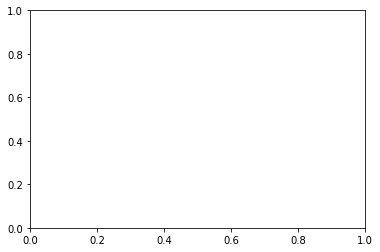

In [234]:
#print('all_means',all_means)
#print('true_means',true_means)
#print('false_means',false_means)

x = np.arange(len(labels))  # the label locations
#print(x)
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
#print('x - width/2',x - width/2)
#print('width',width)
#print(len(true_means),len(false_means))
rects1 = ax.bar(x - width/2, true_means, width, label='true',fill=False)

rects2 = ax.bar(x + width/2, false_means, width, label='false')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()